# Name: Yujie Feng


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats


In [2]:
df = pd.read_excel('/Users/fengyujie/Desktop/grid1.xlsx',sheet_name='Worksheet',engine='openpyxl',skiprows=1)

In [266]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mid       40 non-null     float64
 1   Strike    40 non-null     int64  
 2   IVM       40 non-null     float64
 3   sDM       40 non-null     float64
 4   TM        40 non-null     float64
 5   sGM       40 non-null     float64
 6   sVM       40 non-null     float64
 7   RM        40 non-null     float64
 8   OInt      40 non-null     int64  
 9   Mid.1     40 non-null     float64
 10  Strike.1  40 non-null     int64  
 11  IVM.1     40 non-null     float64
 12  sDM.1     40 non-null     float64
 13  TM.1      40 non-null     float64
 14  sGM.1     40 non-null     float64
 15  sVM.1     40 non-null     float64
 16  RM.1      40 non-null     float64
 17  OInt.1    40 non-null     int64  
 18  IV        40 non-null     int64  
dtypes: float64(14), int64(5)
memory usage: 6.1 KB


# Estimating Implied Volatility

In [68]:
def bsm_price(sigma, s, k, r, T, q):
    # calculate the bsm price of European call and put options

        
    sigma = float(sigma)
    d1 = (np.log(s / k) + (r - q + sigma ** 2 * 0.5) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = np.exp(-r*T) * (s * np.exp((r - q)*T) * norm.cdf(d1) - k *  norm.cdf(d2))
    return price

In [69]:
def implied_vol(option_price, s, k, r, T, q):
    # apply bisection method to get the implied volatility by solving the BSM function
    precision = 0.00001
    upper_vol = 500.0
    max_vol = 500.0
    min_vol = 0.0001
    lower_vol = 0.0001
    iteration = 0

    while 1:
        iteration +=1
        mid_vol = (upper_vol + lower_vol)/2.0
        price = bsm_price(mid_vol, s, k, r, T, q)
        lower_price = bsm_price(lower_vol, s, k, r, T, q)
        if (lower_price - option_price) * (price - option_price) > 0:
            lower_vol = mid_vol
        else:
            upper_vol = mid_vol
            if abs(price - option_price) < precision: 
                break 
            elif mid_vol > max_vol - 5 :
                mid_vol = 0.000001
                break

        
    return mid_vol

In [70]:
# Implied volatility 
IV = []
for i in range(len(df)):
    option_price = df['Mid']
    s = 3717
    k = df['Strike']
    r = 0.044
    T = 0.5
    q = 0.019
    IV.append(implied_vol(option_price[i], s, k[i], r, T, q)*100)
print(IV)

[31.888830659270166, 31.58561682787403, 31.321841589242105, 31.052014210277118, 30.7875899563558, 30.533375324116786, 30.276685411592485, 30.022536990554517, 29.775590310922706, 29.529386506414735, 29.288545809191557, 29.052156541946456, 28.798600383739835, 28.61503674099586, 28.35645071429651, 28.14007032648864, 27.904381733821648, 27.654235816266738, 27.438310175718794, 27.216414613142405, 26.99782742783151, 26.791634833837453, 26.61658114941704, 26.34216555249819, 26.20399951061262, 25.960935281187258, 25.776483971791887, 25.616960815792844, 25.38480397224543, 25.186765542318756, 25.008546816969172, 24.830549280686828, 24.673147065908115, 24.49081888051995, 24.30355468647351, 24.137889895880658, 23.968070534321015, 23.821883478365784, 23.661607260904276, 23.50996469302103]


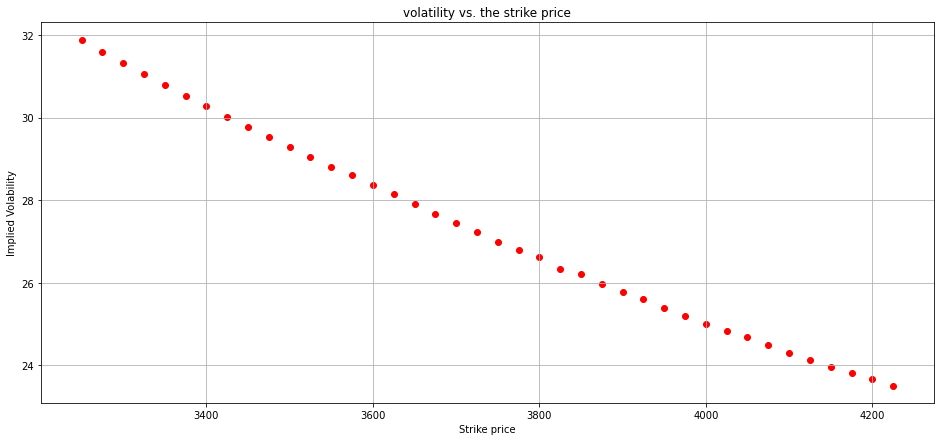

In [224]:
# plot the relation between volatility and strike price
strike = []
for i in range(len(df)):
    s = df['Strike']
    Strike = strike.append(s[i])
plt.figure(figsize=(16, 7))
plt.scatter(strike, IV, c = 'r', label = 'volatility vs. the strike price')
plt.grid()
plt.xlabel('Strike price')
plt.ylabel('Implied Volability')
plt.title('volatility vs. the strike price')
plt.show()

###    When options markets experience a downtrend, implied volatility generally increases. Conversely, market uptrends usually cause implied volatility to fall. Higher implied volatility indicates that greater option price movement is expected in the future.

# Estimating the Option Greeks

In [244]:
N_prime = norm.pdf
N = norm.cdf
df['IV'] = [int(x) for x in IV]

## Delta

In [262]:
def delta_call(s, q, k, T, r, sigma):
    d1 = (np.log(s / k) + (r + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)
    delta_call = np.exp(-q * T) * N(d1)

    return delta_call


def delta_put(s, q, k, T, r, sigma):
    #d1 = (np.log(s / k) + (r + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)
    delta_put = np.exp(-q * T) * (N(d1(s, k, T, r, sigma))-1)

    return delta_put

In [268]:
delta_call0 = []
for i in range(len(df)):
    option_price = df['Mid']
    s = 3717
    k = df['Strike']
    r = 0.044
    T = 0.5
    q = 0.019
    sigma =df['IV']/100
    delta_call0.append(delta_call(s, q, k[i], T, r, sigma[i]))
print(delta_call0)



[0.653312936098349, 0.6469432715895086, 0.6405785537946503, 0.634220647493257, 0.6307779729554837, 0.6242444108153636, 0.6177213165975731, 0.6112105598997092, 0.6070214503966569, 0.6003279577483195, 0.5936510035122047, 0.5869924564634266, 0.5819556408711372, 0.5751085353195313, 0.56828466999678, 0.5614859041202277, 0.5554918945280694, 0.5485005881300686, 0.5415399417059964, 0.5346117921096813, 0.5275437944784753, 0.5204217147993618, 0.513338521068499, 0.5062960096411273, 0.4992959026796169, 0.4907975301450403, 0.4836112549542151, 0.4764747135642281, 0.46938955557907286, 0.4623573504281143, 0.455379588455073, 0.44510173747859305, 0.43795941404237204, 0.43087980334748543, 0.42386427461594806, 0.41691411273380086, 0.4049955022298564, 0.3979055146837097, 0.39089007491512656, 0.3839502937165342]


In [269]:
delta_put0 = []
for i in range(len(df)):
    option_price = df['Mid.1']
    s = 3717
    k = df['Strike.1']
    r = 0.044
    T = 0.5
    q = 0.019
    sigma =df['IV']/100
    delta_put0.append(delta_put(s, q, k[i], T, r, sigma[i]))
print(delta_put0)


[-0.33723204634455156, -0.34360171085339186, -0.3499664286482501, -0.35632433494964344, -0.35976700948741686, -0.36630057162753676, -0.3728236658453273, -0.3793344225431913, -0.38352353204624356, -0.3902170246945809, -0.3968939789306958, -0.4035525259794739, -0.40858934157176335, -0.41543644712336913, -0.42226031244612044, -0.42905907832267276, -0.4350530879148311, -0.4420443943128318, -0.449005040736904, -0.45593319033321916, -0.46300118796442513, -0.4701232676435386, -0.4772064613744014, -0.48424897280177315, -0.4912490797632836, -0.4997474522978601, -0.5069337274886854, -0.5140702688786724, -0.5211554268638275, -0.5281876320147861, -0.5351653939878275, -0.5454432449643073, -0.5525855684005284, -0.559665179095415, -0.5666807078269525, -0.5736308697090997, -0.5855494802130441, -0.5926394677591907, -0.599654907527774, -0.6065946887263663]


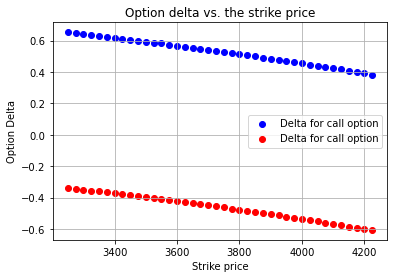

In [308]:
strike = df['Strike']
a = plt.scatter(strike, delta_call0, c = 'blue', label = 'Delta for call option')
b = plt.scatter(strike, delta_put0, c = 'red', label = 'Delta for call option')
plt.grid()
plt.xlabel('Strike price')
plt.ylabel('Option Delta')
plt.title('Option delta vs. the strike price')
plt.legend((a,b), ("Delta for call option", "Delta for call option"))
plt.show()

## Gamma 

In [275]:
def gamma (s, q, k, T, r, sigma):
    d1 = (np.log(s / k) + (r + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)
    gamma = (N_prime(d1)*np.exp(-1*T)/(s*sigma*np.sqrt(T)))
    return gamma
# because gamma has the same calculation function for call and put option, so we don't expand it here.

In [276]:
gamma0 = []
for i in range(len(df)):
    option_price = df['Mid']
    s = 3717
    k = df['Strike']
    r = 0.044
    T = 0.5
    q = 0.019
    sigma =df['IV']/100
    gamma0.append(gamma(s, q, k[i], T, r, sigma[i]))
print(gamma0)

[0.00027289860805461744, 0.0002748252597422235, 0.0002766671306907821, 0.00027842446533468993, 0.0002886531642842531, 0.0002903840489644141, 0.0002920237187436617, 0.00029357266190070463, 0.00030467917881489223, 0.00030617326147237064, 0.00030756956164856126, 0.00030886885116271373, 0.00032085405989074257, 0.00032206342536421047, 0.0003231684189797282, 0.0003241701436395967, 0.0003370073851377619, 0.00033787630890279384, 0.0003386344218171693, 0.00033928321422077617, 0.00035290719887459807, 0.00035337126075647625, 0.0003537184785561993, 0.0003539507959711402, 0.00035407022169264856, 0.0003682285057919203, 0.0003680917682010718, 0.00036783540020465723, 0.00036746193191981136, 0.00036697394481651543, 0.0003663740659070949, 0.0003805002341857642, 0.00037955441192032336, 0.00037849191091358914, 0.0003773159348610559, 0.0003760297139252298, 0.0003897829406584126, 0.00038806151625730577, 0.00038622737495530183, 0.000384284378271593]


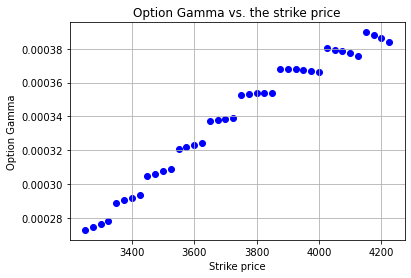

In [279]:
strike = df['Strike']
a = plt.scatter(strike, gamma0, c = 'blue', label = 'Gamma for call option')
plt.grid()
plt.xlabel('Strike price')
plt.ylabel('Option Gamma')
plt.title('Option Gamma vs. the strike price')
plt.show()
# because gamma has the same calculation function for call and put option, so we don't expand it here.


## Theta

In [284]:
def theta_call (s, k, r, T, q, sigma):
    d1 = (np.log(s / k) + (r + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    theta_call = ((-s*N_prime(d1)*sigma*np.exp(-q*T))/(2*np.sqrt(T)) + q*s*N(d1)*np.exp(-q*T) - r*k*np.exp(-r*T)*N(d2))/365
    return theta_call


def theta_put (s, k, r, T, q, sigma):
    d1 = (np.log(s / k) + (r + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    theta_put = ((-s*N_prime(d1)*sigma*np.exp(-q*T))/(2*np.sqrt(T)) - q*s*N(-d1)*np.exp(-q*T) + r*k*np.exp(-r*T)*N(-d2))/365
    return theta_put


In [285]:
theta_call0 = []
for i in range(len(df)):
    option_price = df['Mid']
    s = 3717
    k = df['Strike']
    r = 0.044
    T = 0.5
    q = 0.019
    sigma =df['IV']/100
    theta_call0.append(theta_call(s, k[i], r, T, q, sigma[i]))
print(theta_call0)

[-0.9050045259779267, -0.911010190759595, -0.9167348700097114, -0.9221798561657284, -0.9000986643370347, -0.9050540211906893, -0.9097274448391118, -0.9141209050463205, -0.8911944274781687, -0.8950727755577942, -0.8986699410024511, -0.9019885877100647, -0.8780946779446189, -0.8808711386570018, -0.8833691262543746, -0.8855920176495823, -0.8605845851160262, -0.86223740764795, -0.8636167476734729, -0.864726714069271, -0.8384352663916913, -0.8389476335614608, -0.839194178069487, -0.839179756898811, -0.8389093544917438, -0.8107727953629364, -0.8098802249355674, -0.808738231435449, -0.8073525284990364, -0.8057289169908478, -0.8038732733234374, -0.7732023201056479, -0.7707133961176328, -0.7680031571407906, -0.7650781335262772, -0.7619448864921518, -0.7288412306863771, -0.72507701980115, -0.7211193588579535, -0.7169753823662881]


In [286]:
theta_put0 = []
for i in range(len(df)):
    option_price = df['Mid']
    s = 3717
    k = df['Strike']
    r = 0.044
    T = 0.5
    q = 0.019
    sigma =df['IV']/100
    theta_put0.append(theta_put(s, k[i], r, T, q, sigma[i]))
print(theta_put0)

[-0.7134070045607812, -0.7164645480861308, -0.7192411060799286, -0.7217379709796271, -0.6967086578946144, -0.6987158934919504, -0.7004411958840541, -0.7018865348349442, -0.6760119360104735, -0.6769421628337803, -0.6775912070221186, -0.6779617324734135, -0.651119701451649, -0.6509480409077132, -0.6504979072487674, -0.6497726773876561, -0.6218171235977815, -0.6205218248733864, -0.6189530436425905, -0.6171148887820701, -0.5878753198481714, -0.5854395657616224, -0.58273798901333, -0.5797754465863351, -0.5765569229229492, -0.5454722425378231, -0.5416315508541355, -0.5375414360976984, -0.533207611904967, -0.5286358791404598, -0.5238321142167306, -0.4902130397426222, -0.4847759944982884, -0.4791176342651275, -0.47324448939429553, -0.4671631211038514, -0.43111134404175805, -0.4243990119002122, -0.417493229700697, -0.4104011319527127]


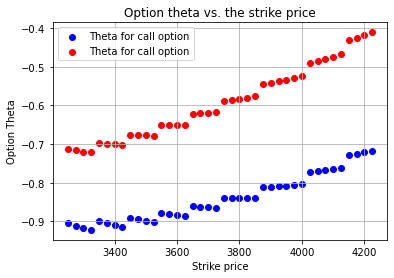

In [309]:
strike = df['Strike']
a = plt.scatter(strike, theta_call0, c = 'blue', label = 'Theta for call option')
b = plt.scatter(strike, theta_put0, c = 'red', label = 'Theta for call option')
plt.grid()
plt.xlabel('Strike price')
plt.ylabel('Option Theta')
plt.title('Option theta vs. the strike price')
plt.legend((a,b), ("Theta for call option", "Theta for call option"))
plt.show()

## Vega

In [291]:
def vega(s, k, r, T, q, sigma):
    d1 = (np.log(s / k) + (r + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)
    vega = (s*np.sqrt(T)*N_prime(d1)*np.exp(-q*T))*0.01
    return vega
# because vega has the same calculation function for call and put option, so we don't expand it here.


In [292]:
vega0 = []
for i in range(len(df)):
    option_price = df['Mid']
    s = 3717
    k = df['Strike']
    r = 0.044
    T = 0.5
    q = 0.019
    sigma =df['IV']/100
    vega0.append(vega(s, k[i], r, T, q, sigma[i]))
print(vega0)

[9.544201160201853, 9.61158278374049, 9.675999333789939, 9.737459359060171, 9.769540718260378, 9.828122956232292, 9.883618002380775, 9.936042382624535, 9.968213798931792, 10.017095824349319, 10.062778692269251, 10.105287654365577, 10.1354291050116, 10.173631638657445, 10.208537179373947, 10.240180566639472, 10.265491603598162, 10.291959657437562, 10.315052331664624, 10.334815023123099, 10.351670397789551, 10.365282519221758, 10.375467304996716, 10.382281768727703, 10.385784830467488, 10.385657212172912, 10.381800613011704, 10.374569912267319, 10.364036470328365, 10.350273095958707, 10.333353882415873, 10.302502771179837, 10.276893492563755, 10.248124996298081, 10.216284026302386, 10.181458043122495, 10.114099776482455, 10.069432202983581, 10.021839847860756, 9.971422909933173]


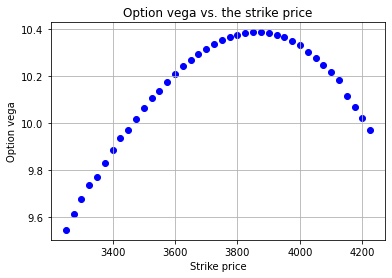

In [293]:
strike = df['Strike']
a = plt.scatter(strike, vega0, c = 'blue', label = 'Vega for call option')
plt.grid()
plt.xlabel('Strike price')
plt.ylabel('Option vega')
plt.title('Option vega vs. the strike price')
plt.show()
# because vega has the same calculation function for call and put option, so we don't expand it here.


## Rho


In [299]:
def rho_call(s, k, r, T, q, sigma):
    d1 = (np.log(s / k) + (r + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    rho_call = (k*T*np.exp(-r*T)*N(d2))*0.0001
    return rho_call

In [300]:
def rho_put(s, k, r, T, q, sigma):
    d1 = (np.log(s / k) + (r + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    rho_put = (-k*T*np.exp(-r*T)*N(-d2))*0.0001
    return rho_put

In [301]:
rho_call0 = []
for i in range(len(df)):
    option_price = df['Mid']
    s = 3717
    k = df['Strike']
    r = 0.044
    T = 0.5
    q = 0.019
    sigma =df['IV']/100
    rho_call0.append(rho_call(s, k[i], r, T, q, sigma[i]))
print(rho_call0)

[0.09158560852472677, 0.09119173636450321, 0.09078616751215478, 0.09036928654266121, 0.0909059360445926, 0.09043982053709806, 0.08996285208741242, 0.08947543435791827, 0.08986072926349171, 0.08932130174150478, 0.08877200137628273, 0.08821325089816874, 0.08842272242579945, 0.08780928388325965, 0.08718711171540781, 0.08655664725326724, 0.0865631867471081, 0.08587556826840616, 0.08518054005565373, 0.08447856091491171, 0.08425246282715043, 0.08349123126641232, 0.08272412663507818, 0.0819516231477626, 0.08117418560485724, 0.08062753860747973, 0.07979016413047851, 0.07894918223102543, 0.07810506787227282, 0.07725828461588244, 0.0764092845205915, 0.07544681856385912, 0.07453971984013666, 0.07363201908755006, 0.07272416905913187, 0.07181660899806223, 0.07045994510842091, 0.06949710536625565, 0.0685364536853258, 0.06757841957769882]


In [302]:
rho_put0 = []
for i in range(len(df)):
    option_price = df['Mid']
    s = 3717
    k = df['Strike']
    r = 0.044
    T = 0.5
    q = 0.019
    sigma =df['IV']/100
    rho_put0.append(rho_put(s, k[i], r, T, q, sigma[i]))
print(rho_put0)

[-0.06737842967109485, -0.06899510212513245, -0.0706234712712949, -0.07226315253460246, -0.07294930332648508, -0.07463821912779363, -0.07633798787129328, -0.07804820589460146, -0.07888571128284202, -0.08064793909864297, -0.08242003975767905, -0.08420159052960703, -0.08521491929579035, -0.08705115813214416, -0.08889613059381, -0.09074939534976459, -0.09196565614973774, -0.0938760749222537, -0.09579390342882015, -0.09771868286337618, -0.09916758124495147, -0.1011516130995036, -0.10314151802465174, -0.10513682180578135, -0.10713705964250068, -0.10890650693369221, -0.11096668170450746, -0.11303046389777456, -0.11509737855034116, -0.11716696210054559, -0.11923876248965051, -0.12142402874019688, -0.12355392775773337, -0.125684428804134, -0.1278150791263662, -0.12994543948124987, -0.13252490366470518, -0.13471054370068447, -0.13689399567542834, -0.13907483007686933]


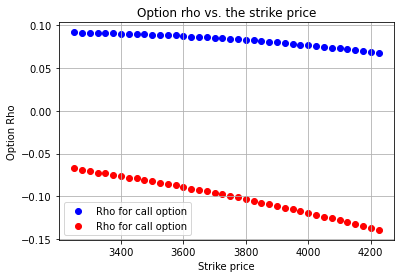

In [311]:
strike = df['Strike']
a = plt.scatter(strike, rho_call0, c = 'blue', label = 'Rho for call option')
b = plt.scatter(strike, rho_put0, c = 'red', label = 'Rho for call option')
plt.grid()
plt.xlabel('Strike price')
plt.ylabel('Option Rho')
plt.title('Option rho vs. the strike price')
plt.legend((a,b), ("Rho for call option", "Rho for call option"))
plt.show()